Численная интерполяция

Введите шаг1


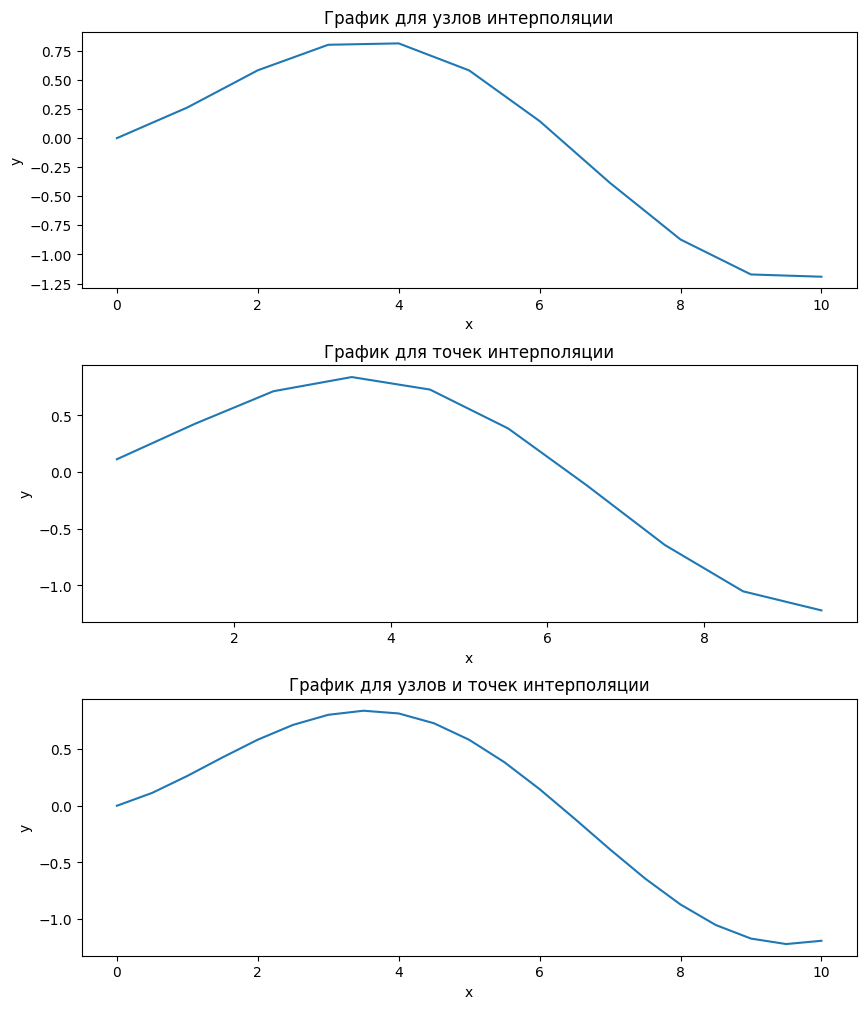

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

a = 0
b = 10

def f(x):
  f = 0.5 * math.log(x + 2) * math.sin(x/2)
  return f


# Узлы интерполяции с равномерным шагом
h = float(input('Введите шаг'))

point = a
x_ravn = []

while point <= b:
  x_ravn.append(point)
  point += h

y_ravn = []
for elem in x_ravn:
  y = f(elem)
  y_ravn.append(y)

data_ravn = pd.DataFrame({'x': x_ravn, 'y': y_ravn})


# Находим середины отрезков между узлами интерполяции
x_mid = []

start_index = 0
finish_index = 1

while finish_index <= len(x_ravn) - 1:
  x = (x_ravn[start_index] + x_ravn[finish_index]) / 2
  x_mid.append(x)
  start_index += 1
  finish_index += 1

def poly_lagr(const, x, y):
        base_for_sum = 0
        for i in range(len(y)):
            base_for_multiplication = 1
            for j in range(len(x)):
                if i != j:
                    base_for_multiplication *= (const - x[j]) / (x[i] - x[j])
                else:
                    None
            base_for_sum += y[i] * base_for_multiplication
        return base_for_sum

y_mid = []
for elem in x_mid:
  y_mid.append(poly_lagr(elem, x_ravn, y_ravn))

data_ravn_poly = pd.DataFrame({'x': x_mid, 'y': y_mid})

# Выводим графики

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,12))

graph1 = sns.lineplot(data_ravn, x=data_ravn.x, y=data_ravn.y, ax=ax[0])
graph2 = sns.lineplot(data_ravn_poly, x=data_ravn_poly.x, y=data_ravn_poly.y, ax=ax[1])
sum = pd.concat([data_ravn, data_ravn_poly], ignore_index=True)
graph3 = sns.lineplot(sum, x=sum.x, y=sum.y, ax=ax[2])
plt.subplots_adjust(hspace=0.3)
ax[0].set_title('График для узлов интерполяции')
ax[1].set_title('График для точек интерполяции')
ax[2].set_title('График для узлов и точек интерполяции')
plt.show()

Введите количество узлов Чебышева30


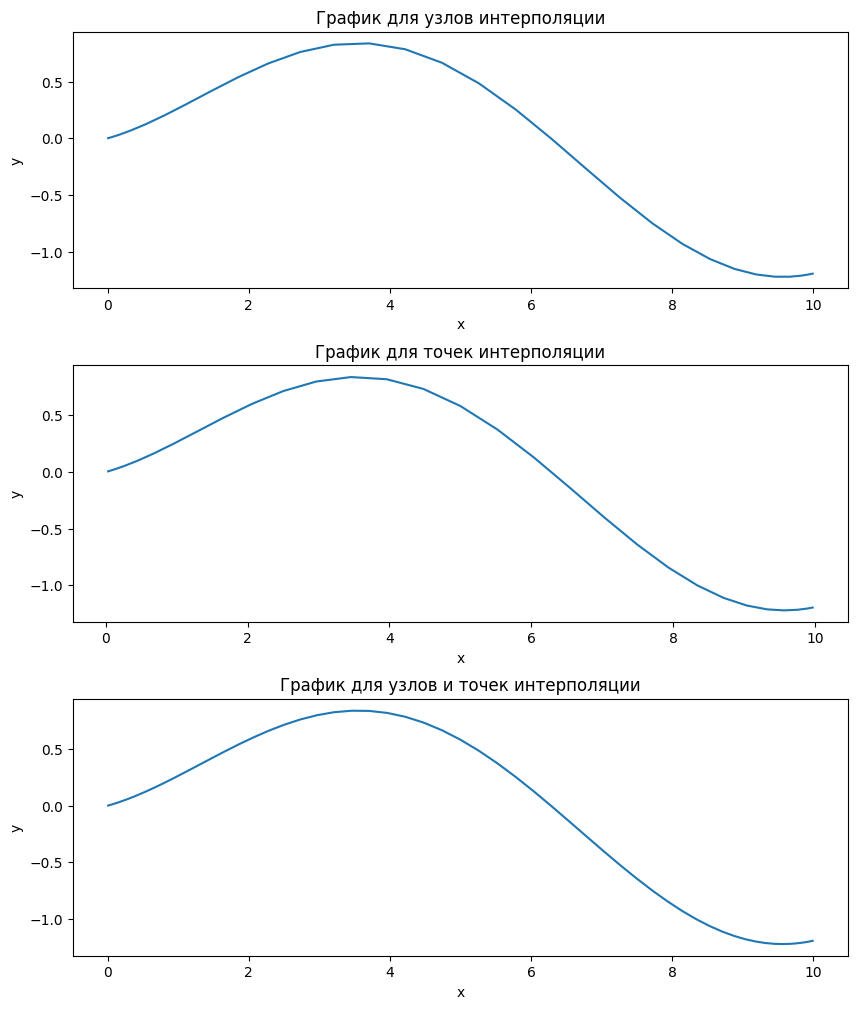

In [ ]:
# Определение координат узлов Чебышёва

n = int(input('Введите количество узлов Чебышева'))

x_cheb = []
y_cheb = []

for i in range(1, n + 1):
  point = 0.5 * (a + b) + 0.5 * (b - a) * math.cos(((2 * i - 1) * math.pi ) / (2 * n))
  x_cheb.append(point)
  y_cheb.append(f(point))

data_cheb = pd.DataFrame({'x': x_cheb, 'y': y_cheb})

# Определение середин отрезков между узлами Чебышёва
x_mid = []

start_index = 0
finish_index = 1

while finish_index <= len(x_cheb) - 1:
  x = (x_cheb[start_index] + x_cheb[finish_index]) / 2
  x_mid.append(x)
  start_index += 1
  finish_index += 1

y_mid = []
for elem in x_mid:
  y_mid.append(poly_lagr(elem, x_cheb, y_cheb))

data_cheb_poly = pd.DataFrame({'x': x_mid, 'y': y_mid})

# Выводим графики

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,12))

graph1 = sns.lineplot(data_cheb, x=data_cheb.x, y=data_cheb.y, ax=ax[0])
graph2 = sns.lineplot(data_cheb_poly, x=data_cheb_poly.x, y=data_cheb_poly.y, ax=ax[1])
sum = pd.concat([data_cheb, data_cheb_poly], ignore_index=True)
graph3 = sns.lineplot(sum, x=sum.x, y=sum.y, ax=ax[2])
plt.subplots_adjust(hspace=0.3)
ax[0].set_title('График для узлов интерполяции')
ax[1].set_title('График для точек интерполяции')
ax[2].set_title('График для узлов и точек интерполяции')
plt.show()